In [1]:
# Import Libraries 

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
# import CSV file to dataframe

companies = pd.read_csv('Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = companies.iloc[:,:-1].values # Setting all the independent Variables to The X variable

In [4]:
y = companies.iloc[:,4].values  # Setting all the dependent Variables to The y variable

<Axes: >

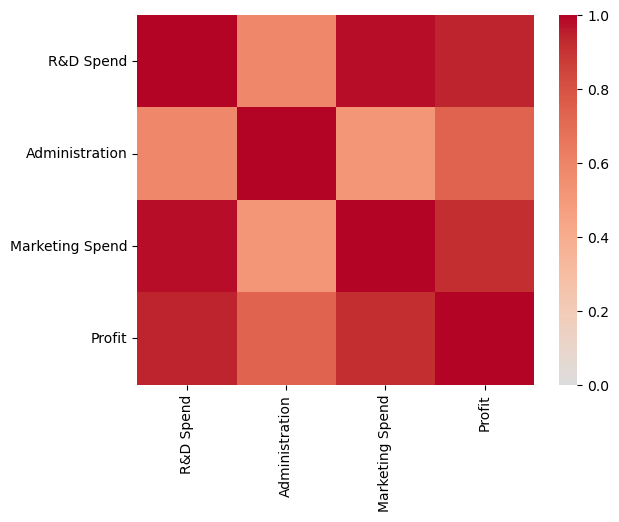

In [5]:
#  'State' is the only non-numeric column
correlation_matrix = companies.drop('State', axis=1).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm' ,vmin=0, vmax=1, center=0)


In [6]:
companies['State'].unique()
# see how many unique values are there in state

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
# Encoding The State Column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

onehotencoder = ColumnTransformer(
    transformers=[
        ("State", OneHotEncoder(), [3])
    ],
    remainder="passthrough"
)

# Applying the ColumnTransformer to matrix X
X = onehotencoder.fit_transform(X)
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [8]:
# Splitting the Data into training and testing set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
# 80% of data is for training and 20% is for testing
print(len(X_test))

200


In [11]:
# fitting Multiple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([168195.76709884, 144071.48408763,  78474.90150159, 123721.43743924,
       109098.8668969 ,  79241.48673922,  51640.1309429 , 166842.48627773,
       175847.04232682,  58014.14155996, 105626.93896391,  91086.21027493,
       123774.80170184, 173758.70226228,  73625.38797809, 179624.23246954,
        77728.4196919 ,  55816.04828528,  92489.72083919,  87320.64344316,
        70032.17420973,  69123.6290572 , 163130.26377578,  69159.64309402,
       139796.95680784,  74104.33675442,  55606.82362567, 181553.17629223,
       174298.25653857, 100606.60655996, 185364.86614183, 150596.71014303,
       124349.49264966, 185534.44614263,  57401.90626602, 126229.76091728,
       177950.91168294,  72570.50944665,  91424.73331189, 145545.48862234,
       186161.64387047, 162429.90499134, 172395.69384238, 102431.11881967,
       310292.46285788, 147619.72760922,  65274.02938628, 161701.04884289,
       178113.83250837,  95536.33976625,  60739.02950007, 119163.94245806,
       155125.23158006, 1

In [13]:
regressor.coef_ # Coefficeint of the X's in Y = MX + C

array([ 3.26028974e+02, -2.29797433e+02, -9.62315412e+01,  5.96494562e-01,
        7.97629375e-01,  7.42086482e-02])

In [14]:
regressor.intercept_ # Y intercept of plot of Y = MX + C

-44120.21032829273

In [15]:
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)
#R2 score tells us how good the line of best fit is 

0.9161404116176576

In [16]:
Bank = companies['Profit'] > 150000

In [18]:
NYC = companies['State'] == 'New York'

In [20]:
companies[NYC]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.8000,471784.1000,New York,192261.83000
3,144372.41,118671.8500,383199.6200,New York,182901.99000
5,131876.90,99814.7100,362861.3600,New York,156991.12000
8,120542.52,148718.9500,311613.2900,New York,152211.77000
15,114523.61,122616.8400,261776.2300,New York,129917.04000
...,...,...,...,...,...
985,63615.00,119852.0486,191524.3554,New York,103378.64470
987,41289.00,116554.8432,148446.2774,New York,84305.73556
991,131106.00,129819.4269,321748.4242,New York,161035.62360
994,97209.00,124813.3635,256344.0701,New York,132077.70900
